Огромная благодарнасть выражается автору кода с сайта https://python-scripts.com/build-neural-network, чей код помог разобраться в основах работы с нейронными сетями и сделать 4 домашнее задание.

In [144]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from IPython.display import clear_output
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

## Инициализация Гипер-параметров
Гипер-параметры – это мощные аргументы с предварительной настройкой и не будут обновляться в ходе изучения нейронной сети.

In [48]:
input_size = 784       # Размеры изображения = 28 x 28 = 784
hidden_size = 10        # Количество узлов на скрытом слое
num_classes = 10       # Число классов на выходе. В этом случае от 0 до 9
num_epochs = 5         # Количество тренировок всего набора данных
batch_size = 100       # Размер входных данных для одной итерации
learning_rate = 0.001  # Скорость конвергенции

## Загрузка набора данных MNIST
MNIST – это огромная база данных с тоннами прописанных чисел (т.е. от 0 до 9), которая направлена на обработку изображений.

In [332]:
def gauss(x):
    noize_normal = np.random.normal(0, 10, size = np.array(x).shape)
    np_to_image = np.array(x) + np.abs(noize_normal)
    np_expand_dims = np.expand_dims(np_to_image, axis=2)
    return np.uint8(np_expand_dims)

In [333]:
train_dataset = dsets.MNIST(
    root='./data',
    train=True,
    transform=transforms.Compose(
        [
            transforms.Lambda(lambda x: gauss(x)) ,
            transforms.ToPILImage() ,
            transforms.ToTensor()
        ]),
    download=True
)
 
test_dataset = dsets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)

In [336]:
train_dataset.__getitem__(10)[0].reshape((28,28))

tensor([[0.0157, 0.0157, 0.0471, 0.0196, 0.0667, 0.0353, 0.0078, 0.0392, 0.0235,
         0.0039, 0.0510, 0.0510, 0.0471, 0.0157, 0.0039, 0.0196, 0.0039, 0.0314,
         0.0275, 0.0588, 0.0353, 0.0353, 0.0275, 0.0235, 0.0667, 0.0941, 0.0392,
         0.0353],
        [0.0353, 0.0706, 0.0314, 0.0431, 0.0000, 0.0706, 0.0118, 0.0000, 0.0353,
         0.0941, 0.0510, 0.0824, 0.0235, 0.0118, 0.0196, 0.0118, 0.0471, 0.0000,
         0.0745, 0.0196, 0.0431, 0.0627, 0.0353, 0.0118, 0.0157, 0.0275, 0.0549,
         0.0706],
        [0.0275, 0.0471, 0.0745, 0.0000, 0.0039, 0.0039, 0.0275, 0.0039, 0.0078,
         0.0118, 0.0353, 0.0039, 0.0039, 0.0118, 0.0118, 0.0118, 0.0902, 0.0039,
         0.0314, 0.0353, 0.0196, 0.0039, 0.0118, 0.0392, 0.0431, 0.0078, 0.0078,
         0.0392],
        [0.0275, 0.0039, 0.0314, 0.0118, 0.0471, 0.0078, 0.0627, 0.1176, 0.0078,
         0.0392, 0.0471, 0.0039, 0.0275, 0.0118, 0.0000, 0.0000, 0.0118, 0.0510,
         0.0431, 0.0157, 0.0118, 0.0314, 0.0078, 0.0000

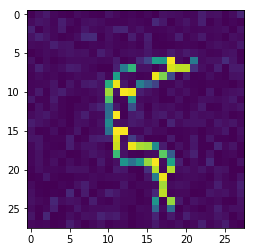

In [338]:
plt.imshow(train_dataset.__getitem__(100)[0].reshape((28,28)))

Загрузка набора данных. После загрузки MNIST, мы загружаем набор данных в наш код:

In [136]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
 
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

## Создаем нейронную сеть Feedforward

In [137]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Наследуемый родительским классом nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1й связанный слой: 784 (данные входа) -> 500 (скрытый узел)
        self.relu = nn.ReLU()                          # Нелинейный слой ReLU max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2й связанный слой: 500 (скрытый узел) -> 10 (класс вывода)
    
    def forward(self, x):                              # Передний пропуск: складывание каждого слоя вместе
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

Структура модели нейросети
Нейронная сеть включает в себя два полностью соединенных слоя (т.е. fc1 и fc2) и нелинейный слой ReLU между ними. 
Как правило, мы называем эту структуру 1-скрытый слой нейросети, отбрасывая слой вывода (fc2).
https://python-scripts.com/wp-content/uploads/2018/02/Feedforward.png
Запустив следующий код, указанные изображения (х) могут пройти через нейронную сеть и сгенерировать вывод (out), показывая, 
как именно соответствие принадлежит каждому из 10 классов. Например, изображение кошки соответствует изображению собаки на 0.8, 
в то врем я как соответствие изображению самолета – 0.3.

In [138]:
net = Net(input_size, hidden_size, num_classes)

In [139]:
#net.cuda() # Вы можете прокомментировать (#) эту строку для отключения GPU

## Выбираем функцию потерь и оптимизатор

In [140]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

## Тренируем нейросеть

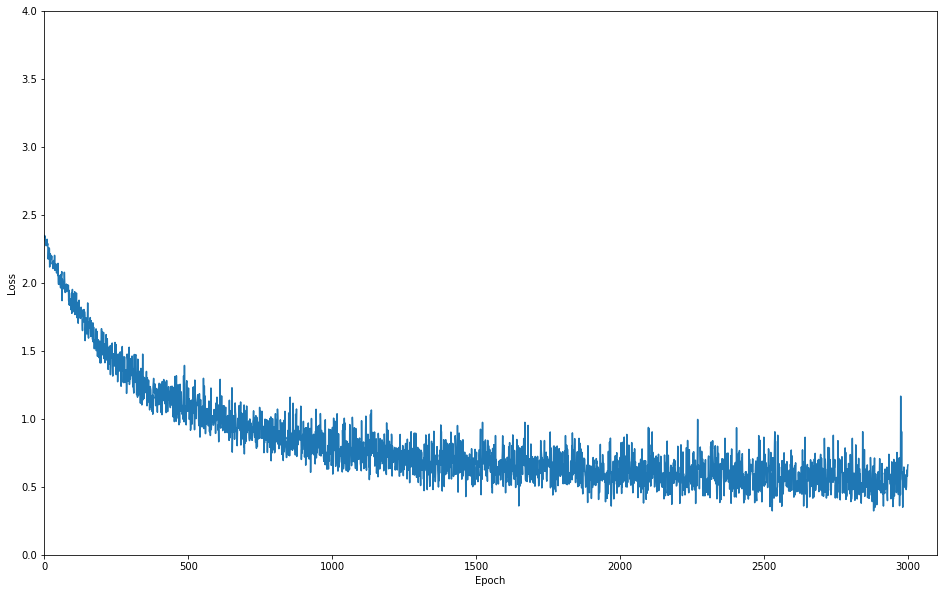

Epoch [5/5], Step [600/600], Loss: 0.6614


In [141]:
history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Загрузка партии изображений с индексом, данными, классом
        images = Variable(images.view(-1, 28*28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
        labels = Variable(labels)
        
        optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
        outputs = net(images)                             # Передний пропуск: определение выходного класса, данного изображения
        loss = criterion(outputs, labels)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
        loss.backward()                                   # Обратный проход: определение параметра weight
        optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
        
        history.append(loss.data.numpy())
        if (i+1) % 100 == 0:                              # Логирование
            fig = plt.figure(figsize=(16,10))
            clear_output(True)
            plt.plot(history,label='loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.ylim(0, 4)
            plt.xlim(0, 3100)
            #plt.legend()
            plt.show()
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

## Тестируем модель нейросети

In [46]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # Выбор лучшего класса из выходных данных: класс с лучшим счетом
    total += labels.size(0)                    # Увеличиваем суммарный счет
    correct += (predicted == labels).sum()     # Увеличиваем корректный счет
 
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 87 %


## Обучение нейросети с зашумленными данными

In [168]:
train_loader_noised = torch.utils.data.DataLoader(
    dataset = #train_dataset.train_data + random.normal(0,0.2,28*28),
    batch_size = batch_size,
    shuffle = True
)

TypeError: add() received an invalid combination of arguments - got (numpy.ndarray), but expected one of:
 * (Tensor other, Number alpha)
 * (Number other, Number alpha)


In [256]:
def gaussian(ins, is_training = True, stddev=0.2):
    if is_training:
        return ins + )
    return ins

In [260]:
gaussian(train_loader)

AttributeError: 'DataLoader' object has no attribute 'size'

In [181]:
train_dataset.train_data.shape

torch.Size([60000, 28, 28])

In [232]:
train_dataset.train_data + torch.normal(mean=torch.zeros((60000,28, 28)), std=torch.ones((60000,28, 28)))#.reshape((28,28))

RuntimeError: Expected object of type torch.ByteTensor but found type torch.FloatTensor for argument #3 'other'

In [250]:
name_1 = train_dataset.train_data.data.numpy()[0][0][0]

In [231]:
torch.normal(mean=torch.zeros((60000,28,28)), std=torch.ones((60000,28,28))).shape

torch.Size([60000, 28, 28])

In [233]:
train_dataset.train_data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [217]:
torch.normal(mean=torch.zeros(28*28), std=torch.ones(28*28)).reshape((28,28))

tensor([[ 0.2645, -0.3334, -0.0159,  0.3377, -0.6424,  0.0952,  0.0371, -0.0590,
         -0.3847, -0.5277, -0.4072,  0.8680, -0.1377, -0.2995, -2.6281, -1.6996,
          0.1529,  0.0899,  0.4699,  0.2505,  0.5827, -1.6777,  0.3672,  0.8088,
          0.3781,  0.9979,  0.2228, -0.7780],
        [-1.3693,  1.5404,  0.8169, -0.6458,  0.9310,  1.3199,  0.7781,  1.0941,
          0.5717,  0.5832, -0.6797,  0.7132,  0.2517,  0.4420,  0.1882,  0.4198,
          0.0510, -2.9576,  2.2042,  1.0170,  2.0938, -0.4068, -0.2500,  0.5948,
          0.6742,  0.0375, -0.0525,  2.5194],
        [ 0.1560, -0.2067, -2.0890, -0.3579, -0.0281,  0.6212,  0.0349, -1.2263,
         -1.0949,  1.1350,  0.4531,  0.3236, -1.8557,  0.0103,  0.6885, -0.1458,
          0.2015,  0.0982, -0.1832,  1.8007,  0.8157, -1.9588, -0.8769, -0.1745,
          0.0882, -0.8293, -0.6372,  0.0486],
        [ 0.6706,  0.1432,  0.5732, -0.9167,  1.0586, -0.9610,  0.0757, -2.1303,
          0.8981, -0.2204,  0.4447,  2.2476, -2.3581

In [214]:
torch.normal(mean=torch.tensor([0,0]), std=torch.tensor([1,1]))

RuntimeError: normal is not implemented for type torch.LongTensor

In [209]:
torch.ones((1, 28))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
torch.normal(mean=torch.zeros(28), std=torch.arange(1, 0, -0.1))